In [203]:
import random
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

In [204]:
np.random.seed(1337)
random.seed(1337)

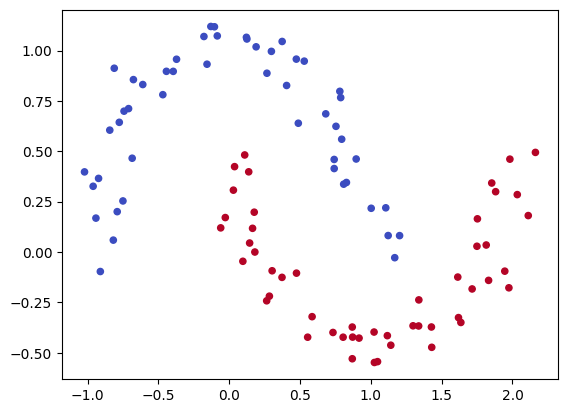

In [205]:
# Create data
X, y = make_moons(n_samples=100, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
y = torch.where(y == 0, -1.0, 1.0)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.get_cmap('coolwarm'))

In [206]:
# Define MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 inputs, two hidden layers with 16 outputs and one with 20 outputs,
        # output is 1 value
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 16),
            nn.Tanh(),
            nn.Linear(16, 20),
            nn.Tanh(),
            nn.Linear(20, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

In [207]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight, a=-1.0, b=1.0)
        nn.init.uniform_(m.bias, a=-1.0, b=1.0)

In [208]:
model = MLP()

model.apply(init_weights)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# Training loop
for k in range(150):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = ((y_pred - y) ** 2).sum()

    # Accuracy: sign agreement
    acc = ((y_pred > 0) == (y > 0)).float().mean().item()

    loss.backward()
    optimizer.step()

    print(f'Step {k}, loss: {loss.item():.4f}, accuracy: {acc*100:.2f}%')

Step 0, loss: 187.1249, accuracy: 50.00%
Step 1, loss: 183.4273, accuracy: 50.00%
Step 2, loss: 178.0916, accuracy: 50.00%
Step 3, loss: 170.5045, accuracy: 50.00%
Step 4, loss: 160.3980, accuracy: 50.00%
Step 5, loss: 148.5683, accuracy: 50.00%
Step 6, loss: 136.7680, accuracy: 63.00%
Step 7, loss: 126.3412, accuracy: 67.00%
Step 8, loss: 117.7421, accuracy: 69.00%
Step 9, loss: 110.9710, accuracy: 72.00%
Step 10, loss: 105.7270, accuracy: 75.00%
Step 11, loss: 101.5870, accuracy: 76.00%
Step 12, loss: 98.1963, accuracy: 76.00%
Step 13, loss: 95.3118, accuracy: 77.00%
Step 14, loss: 92.7736, accuracy: 77.00%
Step 15, loss: 90.4742, accuracy: 79.00%
Step 16, loss: 88.3397, accuracy: 79.00%
Step 17, loss: 86.3183, accuracy: 79.00%
Step 18, loss: 84.3744, accuracy: 79.00%
Step 19, loss: 82.4850, accuracy: 79.00%
Step 20, loss: 80.6369, accuracy: 79.00%
Step 21, loss: 78.8239, accuracy: 79.00%
Step 22, loss: 77.0439, accuracy: 79.00%
Step 23, loss: 75.2961, accuracy: 80.00%
Step 24, loss:

/tmp/ipykernel_36518/1754262940.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


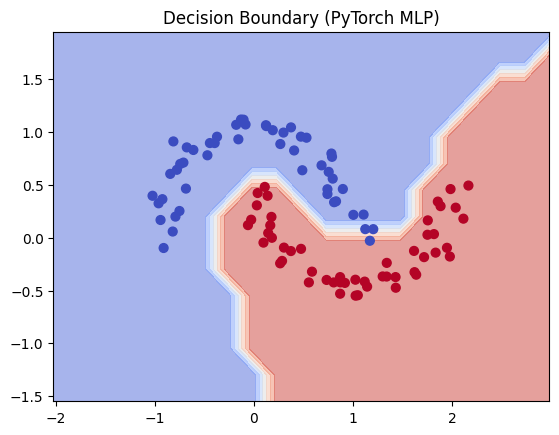

In [209]:
# Decision boundary plotting
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Xmesh_tensor = torch.tensor(Xmesh, dtype=torch.float32)

with torch.no_grad():
    scores = model(Xmesh_tensor)
    Z = (scores.numpy() > 0).astype(int).reshape(xx.shape)

# Plot
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.get_cmap('coolwarm'), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=cast(torch.Tensor, y).numpy().flatten(), s=40, cmap=plt.get_cmap('coolwarm'))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary (PyTorch MLP)")
plt.show()